# Assignment-2
Due date: March 1st 

In this assignment, you are working at a hypothetical bank called `InvRes` Bank offering consulting service to its customers. Your first aim is to find out the risk level of these stocks relative to the market index.



To accomplish this task, you will use Capital Asset Pricing Model (CAPM), which dates back to 1960’s, yet still powerful tool in finance due to its intuitive and easy-to-apply nature. As it is completely white-box model, it makes it easy to understand and explain. 

Once you estimate the slope coefficient (beta) and intercept term (alpha) of the CAPM model, you will be able to assess if the asset is risky compared to market. Then, your next task is to find out the stock with best risk-return relationship. To do that, you are required to employ the following ratios:

• Sharpe ratio

• Treynor ratio

You can pick any two stocks and market index other than those we have in the class.

This assignment will be divided into 4 milestones.

1. Accessing the data and obtain daily risk-free rate. Besides, analyze data via summary statistic. (25 pts)

2. Examine the data through visualization and correlation. Calculate returns of the stocks and market. (25 pts)

3. Run Capital Asset Pricing Model and interpret the results. (25 pts)

4. Calculate Sharpe and Treynor measures. Compare and interpret the results and conclude. (25 pts)


In [1]:
!pip3 install yfinance
!pip3 install fred
!pip install fredapi

In [2]:
# codes here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')
from fredapi import Fred
fred = Fred(api_key='78b14ec6ba46f484b94db43694468bb1')
import statsmodels.api as sm

In [81]:
stocks = ['WMT','TSLA','^NYA']
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2020,10,1)
portfolio = yf.download(stocks, start = start, end=end, interval = '1d')['Close']
portfolio.rename({'^NYA':'NYA'},axis='columns',inplace=True)
portfolio

[*********************100%***********************]  3 of 3 completed


,TSLA,WMT,NYA
Date,,,
2020-01-02,28.684000,118.940002,14002.490234
2020-01-03,29.534000,117.889999,13917.049805
2020-01-06,30.102667,117.650002,13941.799805
2020-01-07,31.270666,116.559998,13898.450195
2020-01-08,32.809334,116.160004,13934.440430
...,...,...,...
2020-09-24,129.263336,136.699997,12365.540039
2020-09-25,135.779999,137.270004,12485.379883
2020-09-28,140.399994,137.250000,12677.540039


Stocks = Walmart and Tesla, Market Index = NYSE composite

In [82]:
portfolio.isna().sum()

TSLA    0
WMT     0
NYA     0
dtype: int64

No Null Values

In [83]:
portfolio.describe()

,TSLA,WMT,NYA
count,189.000000,189.000000,189.000000
mean,71.612677,124.155344,12270.427931
std,36.959836,8.538409,1222.898912
min,24.081333,104.050003,8777.379883
25%,45.266666,117.160004,11351.599609
50%,54.681999,122.940002,12461.780273
75%,99.305336,131.210007,12974.830078
max,166.106674,147.679993,14183.200195


NYA is on a different stand than the other since it is the market index.
Walmart is more volatile and seems to have generated more returns as the disparity between min value and max value is more than Tesla

In [84]:
fred.search('risk free')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
DGS10,DGS10,2023-02-28,2023-02-28,Market Yield on U.S. Treasury Securities at 10...,1962-01-02,2023-02-24,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-27 15:22:03-06:00,92,For further information regarding treasury con...
GS10,GS10,2023-02-28,2023-02-28,Market Yield on U.S. Treasury Securities at 10...,1953-04-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-01 15:21:11-06:00,73,Averages of business days. For further informa...
WGS10YR,WGS10YR,2023-02-28,2023-02-28,Market Yield on U.S. Treasury Securities at 10...,1962-01-05,2023-02-24,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2023-02-27 15:18:02-06:00,54,Averages of business days. For further informa...
DGS2,DGS2,2023-02-28,2023-02-28,Market Yield on U.S. Treasury Securities at 2-...,1976-06-01,2023-02-24,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-27 15:22:07-06:00,82,For further information regarding treasury con...
DGS1,DGS1,2023-02-28,2023-02-28,Market Yield on U.S. Treasury Securities at 1-...,1962-01-02,2023-02-24,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-27 15:22:02-06:00,80,For further information regarding treasury con...
GS1,GS1,2023-02-28,2023-02-28,Market Yield on U.S. Treasury Securities at 1-...,1953-04-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-01 15:21:15-06:00,54,Averages of business days. For further informa...
WGS1YR,WGS1YR,2023-02-28,2023-02-28,Market Yield on U.S. Treasury Securities at 1-...,1962-01-05,2023-02-24,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2023-02-27 15:18:03-06:00,52,Averages of business days. For further informa...
GS2,GS2,2023-02-28,2023-02-28,Market Yield on U.S. Treasury Securities at 2-...,1976-06-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-01 15:21:20-06:00,43,Averages of business days. For further informa...
WGS2YR,WGS2YR,2023-02-28,2023-02-28,Market Yield on U.S. Treasury Securities at 2-...,1976-06-04,2023-02-24,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2023-02-27 15:18:06-06:00,36,Averages of business days. For further informa...


Here I selected Market Yield on U.S. Treasury Securities at 6-Month Constant Maturity which is different than what is discussed in the class. In order to get a daily rate, we can divide each entry by 180 which gives us a fraction for that date

In [85]:
risk_free = fred.get_series('DGS6MO')
risk_free = risk_free['2020-01-01':'2020-10-01']
risk_free

2020-01-01     NaN
2020-01-02    1.57
2020-01-03    1.55
2020-01-06    1.56
2020-01-07    1.56
              ... 
2020-09-25    0.11
2020-09-28    0.11
2020-09-29    0.11
2020-09-30    0.11
2020-10-01    0.10
Length: 197, dtype: float64

In [86]:
risk_free = risk_free.dropna().iloc[:-1]
risk_free.isna().sum()

0

In [87]:
risk_free= risk_free/180
risk_free

2020-01-02    0.008722
2020-01-03    0.008611
2020-01-06    0.008667
2020-01-07    0.008667
2020-01-08    0.008667
                ...   
2020-09-24    0.000611
2020-09-25    0.000611
2020-09-28    0.000611
2020-09-29    0.000611
2020-09-30    0.000611
Length: 189, dtype: float64

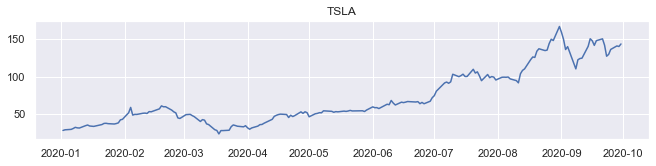

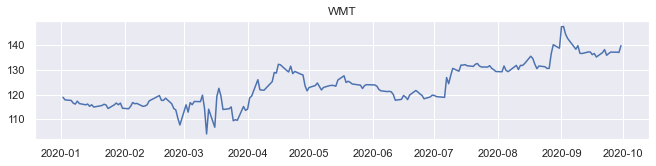

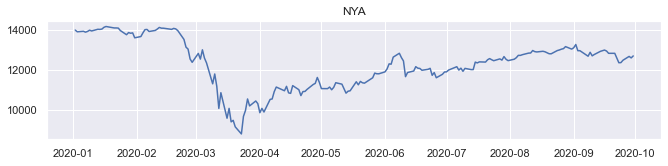

In [88]:
for i, stock in enumerate(portfolio.columns, start=1):
    plt.figure(figsize=(11, 10))
    plt.subplot(4, 1, i)
    plt.plot(portfolio[stock])
    plt.title(f'{stock}')
    plt.show()

The graphs here suggest that both walmart and tesla managed to increased their stock prices for the given period. There was a slight dip during mid march but the companies regained quick and doing good.
Also the overall market index felt a slight disturbance during march-2020 (The time where pandemic has started)

In [89]:
portfolio.corr()

,TSLA,WMT,NYA
TSLA,1.000000,0.846123,0.272698
WMT,0.846123,1.000000,0.082448
NYA,0.272698,0.082448,1.000000


<AxesSubplot:>

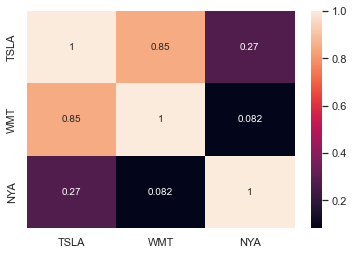

In [90]:
sns.heatmap(portfolio.corr(),annot=True)

In [ ]:
We can see that there is a high correlation between the stocks of walmart and tesla, which implies that if one stock goes up the other does in the same way.


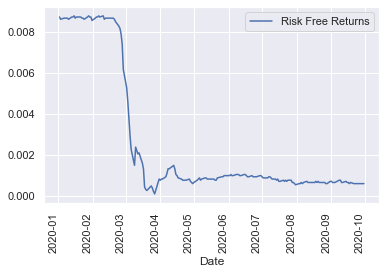

In [91]:
risk_free.plot(kind='line',rot=90,legend=True,label='Risk Free Returns',xlabel='Date')
plt.show()

We could see that the risk free factor has drastically dipped and maintained the same through out the time period.
Risk free indicates how well a investor can get benifitted. But after the pandemic it was reduced which inturn associated with increased risk.


In [92]:
returns = portfolio.pct_change()
returns.dropna(axis=0,inplace=True)
returns

,TSLA,WMT,NYA
Date,,,
2020-01-03,0.029633,-0.008828,-0.006102
2020-01-06,0.019255,-0.002036,0.001778
2020-01-07,0.038801,-0.009265,-0.003109
2020-01-08,0.049205,-0.003432,0.002590
2020-01-09,-0.021945,0.010331,0.004536
...,...,...,...
2020-09-24,0.019534,0.005221,0.000516
2020-09-25,0.050414,0.004170,0.009691
2020-09-28,0.034026,-0.000146,0.015391


In [93]:
print(len(returns),len(portfolio),len(risk_free))

188 189 189


In [94]:
returns.head()

,TSLA,WMT,NYA
Date,,,
2020-01-03,0.029633,-0.008828,-0.006102
2020-01-06,0.019255,-0.002036,0.001778
2020-01-07,0.038801,-0.009265,-0.003109
2020-01-08,0.049205,-0.003432,0.002590
2020-01-09,-0.021945,0.010331,0.004536


In [95]:
stocks = portfolio.columns
for i in stocks:
    returns[f"excess_return_{i}"] = returns[i] - risk_free

In [96]:
returns.isna().sum()

TSLA                  0
WMT                   0
NYA                   0
excess_return_TSLA    0
excess_return_WMT     0
excess_return_NYA     0
dtype: int64

In [97]:
returns

,TSLA,WMT,NYA,excess_return_TSLA,excess_return_WMT,excess_return_NYA
Date,,,,,,
2020-01-03,0.029633,-0.008828,-0.006102,0.021022,-0.017439,-0.014713
2020-01-06,0.019255,-0.002036,0.001778,0.010588,-0.010702,-0.006888
2020-01-07,0.038801,-0.009265,-0.003109,0.030134,-0.017931,-0.011776
2020-01-08,0.049205,-0.003432,0.002590,0.040538,-0.012098,-0.006077
2020-01-09,-0.021945,0.010331,0.004536,-0.030612,0.001664,-0.004130
...,...,...,...,...,...,...
2020-09-24,0.019534,0.005221,0.000516,0.018923,0.004610,-0.000095
2020-09-25,0.050414,0.004170,0.009691,0.049803,0.003559,0.009080
2020-09-28,0.034026,-0.000146,0.015391,0.033414,-0.000757,0.014780


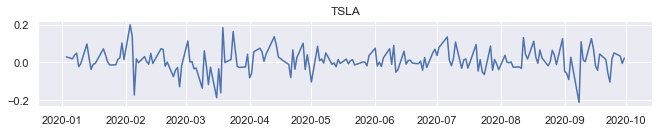

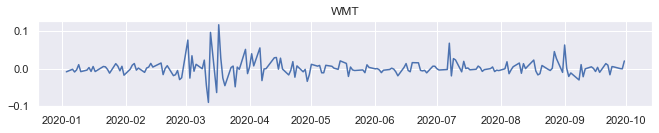

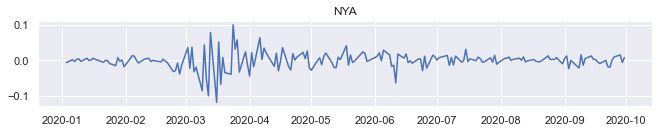

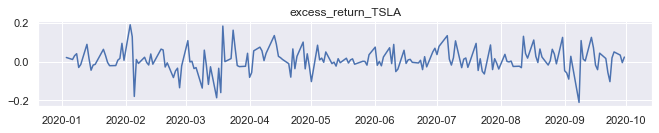

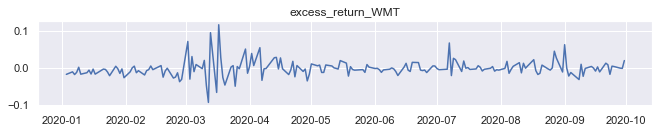

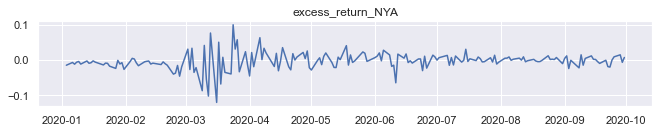

In [98]:
for i, stock in enumerate(returns.columns, start=1):
    plt.figure(figsize=(11, 11))
    plt.subplot(len(returns.columns), 1, i)
    plt.plot(returns[stock])
    plt.title(f'{stock}')
    plt.show()

The graphs for Walmart, Tesla, NYA looks similar

In [106]:
X = returns['excess_return_NYA']
y_WMT = returns['excess_return_WMT']
y_TSLA = returns['excess_return_TSLA']

In [107]:
X 

Date
2020-01-03   -0.014713
2020-01-06   -0.006888
2020-01-07   -0.011776
2020-01-08   -0.006077
2020-01-09   -0.004130
                ...   
2020-09-24   -0.000095
2020-09-25    0.009080
2020-09-28    0.014780
2020-09-29   -0.006519
2020-09-30    0.007264
Name: excess_return_NYA, Length: 188, dtype: float64

In [108]:
y_WMT

Date
2020-01-03   -0.017439
2020-01-06   -0.010702
2020-01-07   -0.017931
2020-01-08   -0.012098
2020-01-09    0.001664
                ...   
2020-09-24    0.004610
2020-09-25    0.003559
2020-09-28   -0.000757
2020-09-29   -0.001413
2020-09-30    0.019587
Name: excess_return_WMT, Length: 188, dtype: float64

In [109]:
y_TSLA

Date
2020-01-03    0.021022
2020-01-06    0.010588
2020-01-07    0.030134
2020-01-08    0.040538
2020-01-09   -0.030612
                ...   
2020-09-24    0.018923
2020-09-25    0.049803
2020-09-28    0.033414
2020-09-29   -0.005668
2020-09-30    0.023108
Name: excess_return_TSLA, Length: 188, dtype: float64

In [110]:
X = sm.add_constant(X, prepend=False)

In [111]:
CAPM_WMT = sm.OLS(y_WMT, X)
CAPMR_WMT = CAPM_WMT.fit()
CAPMR_WMT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_WMT   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     59.86
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           6.28e-13
Time:                        15:43:00   Log-Likelihood:                 471.94
No. Observations:                 188   AIC:                            -939.9
Df Residuals:                     186   BIC:                            -933.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
excess_return_NYA     0.4478      0.058      7.737      0.000       0.334       0.562
const                -0.0002      0.001     -0.129      0.898      -0.003       0.003
==============================================================================
Omnibus:                       57.003   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.793
Skew:                           1.192   Prob(JB):                     1.66e-41
Kurtosis:                       7.277   Cond. No.                         40.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The beta co-efficient for the WALMART stock against the market index is :0.4478 and the intercept term is insignificant.
The P value here (<0.05) suggests that the beta is significant enough. That means for every 1 percent change in Market index, the walmart stock changes by 0.4478 percent

In [112]:
CAPMR_WMT.params[0]

0.4478321126494703

In [113]:
CAPM_TSLA = sm.OLS(y_TSLA, X)
CAPMR_TSLA = CAPM_TSLA.fit()
CAPMR_TSLA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_TSLA   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     53.66
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           7.02e-12
Time:                        15:43:13   Log-Likelihood:                 281.16
No. Observations:                 188   AIC:                            -558.3
Df Residuals:                     186   BIC:                            -551.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
excess_return_NYA     1.1698      0.160      7.325      0.000       0.855       1.485
const                 0.0112      0.004      2.792      0.006       0.003       0.019
==============================================================================
Omnibus:                       11.084   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               26.170
Skew:                           0.049   Prob(JB):                     2.08e-06
Kurtosis:                       4.825   Cond. No.                         40.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The same analysis of P-value goes here. But the beta value here is greater than with the walmart. For every 1 percent change in the market index the tesla's go up by 1.1698

In [114]:
def SML(rf, ret, betas):
    asset_ret = [rf + (rm-rf) * i for i in betas]
    plt.plot(betas, asset_ret)
    plt.xlabel('Asset Beta')
    plt.ylabel('Asset Return')
    plt.title('Security Market Line')
    plt.plot(1, ret, 'ro')

In [115]:
betas = [CAPMR_WMT.params[0], CAPMR_TSLA.params[0]]
rm = returns['NYA'].mean()
risk_free_mean = risk_free.mean()

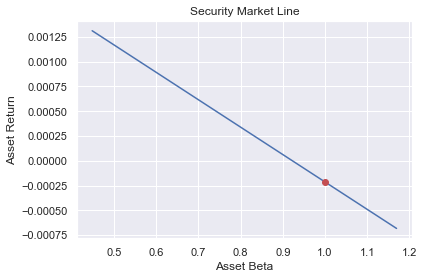

In [116]:
SML(risk_free_mean,rm,betas)

In [117]:
def sharpe(stocks, rf, n_assets):
    sharpe_ratios = {}
    for i,j in zip(stocks, range(n_assets)):
        sharpe_ratios[i] = round((returns.iloc[:, j].mean() - rf) / np.std(returns.iloc[:, j]), 4)
    return sharpe_ratios

In [118]:
stocks = returns.columns[:2]
stocks

Index(['TSLA', 'WMT'], dtype='object')

In [119]:
n_assets = 2
sharpe_ratios = sharpe(stocks, risk_free_mean, n_assets)
print(sharpe_ratios)

{'TSLA': 0.1289, 'WMT': -0.0648}


The higher the sharpe ratio, the better the investment. The better the return for given risk. Hence here the TESLA wins and shows that tesla is a good investment

In [120]:
df_betas = pd.DataFrame(betas)
df_betas.columns = ['betas']
df_betas

,betas
0,0.447832
1,1.169765


In [121]:
def treynor(stocks, rf, n_assets):
    treynor_ratios = {}
    j=0
    for i, stock in enumerate(stocks):
        treynor_ratios[stock] = round((returns.iloc[:, i].mean() - rf) / df_betas['betas'].iloc[j], 4)
        j+=1 
    return treynor_ratios

In [122]:
treynor_ratios = treynor(stocks, risk_free_mean, n_assets)
treynor_ratios


{'TSLA': 0.0177, 'WMT': -0.0012}

 After calculating the treynor ratio we can conclude that the TESLA gives much better returns with the risk associated with it.

In the year 2020, given the months January to October. If one had to invest in only one stock option between WALMART and TESLA and wanted high returns. We should now understand that the TESLA gives a more profitable return in accordance with the risk